In [1]:
import pandas as pd
import numpy as np
import csv
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('XYZCorp_LendingData.txt', skiprows=1)

C:\Users\Admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (18,46,54) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,2,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,3,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,4,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,5,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,6,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
data.shape

(855969, 74)

In [5]:
data.drop(["1","id","member_id","funded_amnt","annual_inc_joint","dti_joint","verification_status_joint","open_acc_6m","open_il_6m","open_il_12m","open_il_24m","mths_since_rcnt_il","total_bal_il","il_util","open_rv_12m","open_rv_24m","max_bal_bc","all_util","inq_fi","total_cu_tl","inq_last_12m","mths_since_last_major_derog","next_pymnt_d","mths_since_last_record","mths_since_last_delinq","desc","policy_code"],axis=1,inplace=True)

In [6]:
data.shape

(855969, 47)

In [7]:
print(data.groupby('default_ind').size())

default_ind
0    809502
1     46467
dtype: int64


In [8]:
data.corr()

,loan_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
loan_amnt,1.000000,0.997601,0.142966,0.944870,0.335209,0.020189,-0.000739,-0.028928,0.198926,-0.082199,...,0.025966,0.075513,0.055135,0.233596,-0.017042,0.003572,-0.004272,0.329130,0.312072,-0.004907
funded_amnt_inv,0.997601,1.000000,0.143374,0.944149,0.334356,0.021489,0.000050,-0.030462,0.200055,-0.081008,...,0.023091,0.073737,0.053082,0.232029,-0.016556,0.003856,-0.004271,0.329152,0.312107,-0.008209
int_rate,0.142966,0.143374,1.000000,0.130468,-0.073825,0.078454,0.055400,0.231705,-0.011091,0.052596,...,0.050743,0.110848,0.074360,0.107346,0.012841,0.026476,0.001129,-0.091430,-0.165533,0.155037
installment,0.944870,0.944149,0.130468,1.000000,0.328578,0.013909,0.007224,0.001659,0.183817,-0.071114,...,0.035728,0.076931,0.057180,0.243246,-0.014565,0.006273,-0.003540,0.298352,0.286857,0.004753
annual_inc,0.335209,0.334356,-0.073825,0.328578,1.000000,-0.086821,0.047749,0.037251,0.139429,-0.008909,...,0.009864,0.007613,0.006805,0.092662,-0.003789,0.014877,0.001005,0.422618,0.271059,-0.037066
dti,0.020189,0.021489,0.078454,0.013909,-0.086821,1.000000,-0.002677,-0.005860,0.142068,-0.022717,...,-0.006245,0.001719,0.002923,-0.028601,-0.000117,0.003227,-0.001995,-0.007133,0.032430,0.004429
delinq_2yrs,-0.000739,0.000050,0.055400,0.007224,0.047749,-0.002677,1.000000,0.022930,0.051502,-0.011081,...,0.013992,-0.000252,0.001467,-0.018805,0.063019,0.130420,0.000154,0.064618,-0.040575,-0.009186
inq_last_6mths,-0.028928,-0.030462,0.231705,0.001659,0.037251,-0.005860,0.022930,1.000000,0.116532,0.059430,...,0.022820,0.044004,0.029647,0.065455,0.007364,-0.004836,0.003181,0.034806,0.006089,0.074407
open_acc,0.198926,0.200055,-0.011091,0.183817,0.139429,0.142068,0.051502,0.116532,1.000000,-0.026122,...,-0.009957,0.001957,0.003990,0.029130,0.009998,0.017774,0.000071,0.244465,0.325179,-0.021698
pub_rec,-0.082199,-0.081008,0.052596,-0.071114,-0.008909,-0.022717,-0.011081,0.059430,-0.026122,1.000000,...,-0.011871,-0.014602,-0.008963,-0.034215,0.020874,-0.000293,0.006816,-0.075956,-0.100227,-0.019607


In [9]:
l1 = data[data.columns].corr()['default_ind'][:]
l1

loan_amnt                    -0.004907
funded_amnt_inv              -0.008209
int_rate                      0.155037
installment                   0.004753
annual_inc                   -0.037066
dti                           0.004429
delinq_2yrs                  -0.009186
inq_last_6mths                0.074407
open_acc                     -0.021698
pub_rec                      -0.019607
revol_bal                    -0.020696
revol_util                    0.044497
total_acc                    -0.021087
out_prncp                    -0.225960
out_prncp_inv                -0.225959
total_pymnt                  -0.039220
total_pymnt_inv              -0.040232
total_rec_prncp              -0.090336
total_rec_int                 0.046050
total_rec_late_fee            0.140760
recoveries                    0.475738
collection_recovery_fee       0.330764
last_pymnt_amnt              -0.087217
collections_12_mths_ex_med   -0.010650
acc_now_delinq               -0.003116
tot_coll_amt             

In [10]:
l2 = []
for i in range(len(l1)):
    if l1[i]<0.02 and l1[i]>(-0.02):
        l2.append(l1.index[i])

In [11]:
l2

['loan_amnt',
 'funded_amnt_inv',
 'installment',
 'dti',
 'delinq_2yrs',
 'pub_rec',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt']

In [12]:
data.drop(l2,axis=1,inplace=True)

In [13]:
data.shape

(855969, 38)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 38 columns):
term                       855969 non-null object
int_rate                   855969 non-null float64
grade                      855969 non-null object
sub_grade                  855969 non-null object
emp_title                  806526 non-null object
emp_length                 812908 non-null object
home_ownership             855969 non-null object
annual_inc                 855969 non-null float64
verification_status        855969 non-null object
issue_d                    855969 non-null object
pymnt_plan                 855969 non-null object
purpose                    855969 non-null object
title                      855936 non-null object
zip_code                   855969 non-null object
addr_state                 855969 non-null object
earliest_cr_line           855969 non-null object
inq_last_6mths             855969 non-null float64
open_acc                   855969 no

In [15]:
data.nunique()

term                            2
int_rate                      520
grade                           7
sub_grade                      35
emp_title                  290912
emp_length                     11
home_ownership                  6
annual_inc                  48163
verification_status             3
issue_d                       103
pymnt_plan                      2
purpose                        14
title                       60991
zip_code                      931
addr_state                     51
earliest_cr_line              697
inq_last_6mths                  9
open_acc                       77
revol_bal                   72779
revol_util                   1338
total_acc                     134
initial_list_status             2
out_prncp                  236739
out_prncp_inv              254328
total_pymnt                494607
total_pymnt_inv            494744
total_rec_prncp            250385
total_rec_int              317683
total_rec_late_fee           5386
recoveries    

In [16]:
print(data.groupby('term').size())
print(data.groupby('pymnt_plan').size())
print(data.groupby('initial_list_status').size())
print(data.groupby('application_type').size())

term
 36 months    600221
 60 months    255748
dtype: int64
pymnt_plan
n    855964
y         5
dtype: int64
initial_list_status
f    442555
w    413414
dtype: int64
application_type
INDIVIDUAL    855527
JOINT            442
dtype: int64


In [17]:
data.drop(["pymnt_plan","application_type"],axis=1,inplace=True)

In [18]:
data.shape

(855969, 36)

In [19]:
data = pd.get_dummies(data,columns = ["term","initial_list_status"],drop_first= True)

In [20]:
data.shape

(855969, 36)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 36 columns):
int_rate                   855969 non-null float64
grade                      855969 non-null object
sub_grade                  855969 non-null object
emp_title                  806526 non-null object
emp_length                 812908 non-null object
home_ownership             855969 non-null object
annual_inc                 855969 non-null float64
verification_status        855969 non-null object
issue_d                    855969 non-null object
purpose                    855969 non-null object
title                      855936 non-null object
zip_code                   855969 non-null object
addr_state                 855969 non-null object
earliest_cr_line           855969 non-null object
inq_last_6mths             855969 non-null float64
open_acc                   855969 non-null float64
revol_bal                  855969 non-null float64
revol_util                 855523 

In [22]:
print(data.groupby('home_ownership').size())

home_ownership
ANY              3
MORTGAGE    429106
NONE            45
OTHER          144
OWN          84136
RENT        342535
dtype: int64


In [23]:
data['home_ownership']=np.where(data['home_ownership']=='MORTGAGE',0,data['home_ownership'])
data['home_ownership']=np.where(data['home_ownership']=='OWN',0,data['home_ownership'])
data['home_ownership']=np.where(data['home_ownership']=='RENT',0,data['home_ownership'])
data['home_ownership']=np.where(data['home_ownership']=='ANY',1,data['home_ownership'])
data['home_ownership']=np.where(data['home_ownership']=='NONE',1,data['home_ownership'])
data['home_ownership']=np.where(data['home_ownership']=='OTHER',1,data['home_ownership'])



In [24]:
print(data.groupby('home_ownership').size())

home_ownership
0    855777
1       192
dtype: int64


In [25]:
data['home_ownership'] = data.home_ownership.astype(float)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 36 columns):
int_rate                   855969 non-null float64
grade                      855969 non-null object
sub_grade                  855969 non-null object
emp_title                  806526 non-null object
emp_length                 812908 non-null object
home_ownership             855969 non-null float64
annual_inc                 855969 non-null float64
verification_status        855969 non-null object
issue_d                    855969 non-null object
purpose                    855969 non-null object
title                      855936 non-null object
zip_code                   855969 non-null object
addr_state                 855969 non-null object
earliest_cr_line           855969 non-null object
inq_last_6mths             855969 non-null float64
open_acc                   855969 non-null float64
revol_bal                  855969 non-null float64
revol_util                 855523

In [27]:
data.groupby('verification_status').size()

verification_status
Not Verified       257742
Source Verified    318178
Verified           280049
dtype: int64

In [28]:
data = pd.get_dummies(data,columns = ["verification_status"],drop_first= True)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 37 columns):
int_rate                               855969 non-null float64
grade                                  855969 non-null object
sub_grade                              855969 non-null object
emp_title                              806526 non-null object
emp_length                             812908 non-null object
home_ownership                         855969 non-null float64
annual_inc                             855969 non-null float64
issue_d                                855969 non-null object
purpose                                855969 non-null object
title                                  855936 non-null object
zip_code                               855969 non-null object
addr_state                             855969 non-null object
earliest_cr_line                       855969 non-null object
inq_last_6mths                         855969 non-null float64
open_acc         

In [30]:
data.groupby('grade').size()

grade
A    145665
B    247998
C    236855
D    132802
E     66448
F     21328
G      4873
dtype: int64

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

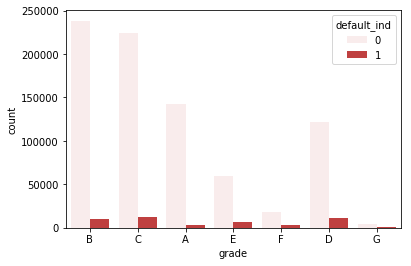

In [32]:
sns.countplot('grade',data=data,hue='default_ind',color='red',saturation=0.5)

In [33]:
data['grade']=np.where(data['grade']=='A',0,data['grade'])
data['grade']=np.where(data['grade']=='B',0,data['grade'])
data['grade']=np.where(data['grade']=='C',0,data['grade'])
data['grade']=np.where(data['grade']=='D',1,data['grade'])
data['grade']=np.where(data['grade']=='E',1,data['grade'])
data['grade']=np.where(data['grade']=='F',1,data['grade'])
data['grade']=np.where(data['grade']=='G',1,data['grade'])

In [34]:
data.groupby('grade').size()

grade
0    630518
1    225451
dtype: int64

In [35]:
data.dtypes

int_rate                               float64
grade                                   object
sub_grade                               object
emp_title                               object
emp_length                              object
home_ownership                         float64
annual_inc                             float64
issue_d                                 object
purpose                                 object
title                                   object
zip_code                                object
addr_state                              object
earliest_cr_line                        object
inq_last_6mths                         float64
open_acc                               float64
revol_bal                              float64
revol_util                             float64
total_acc                              float64
out_prncp                              float64
out_prncp_inv                          float64
total_pymnt                            float64
total_pymnt_i

In [36]:
data['grade'] = data.home_ownership.astype(float)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 37 columns):
int_rate                               855969 non-null float64
grade                                  855969 non-null float64
sub_grade                              855969 non-null object
emp_title                              806526 non-null object
emp_length                             812908 non-null object
home_ownership                         855969 non-null float64
annual_inc                             855969 non-null float64
issue_d                                855969 non-null object
purpose                                855969 non-null object
title                                  855936 non-null object
zip_code                               855969 non-null object
addr_state                             855969 non-null object
earliest_cr_line                       855969 non-null object
inq_last_6mths                         855969 non-null float64
open_acc        

In [38]:
data.shape

(855969, 37)

In [39]:
data['last_credit_pull_d'] = pd.to_datetime(data['last_credit_pull_d'])
data['Month'] = data['last_credit_pull_d'].apply(lambda x: x.month)
data['Year'] = data['last_credit_pull_d'].apply(lambda x: x.year)

In [40]:
data = data.drop(['last_credit_pull_d'], axis = 1)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 38 columns):
int_rate                               855969 non-null float64
grade                                  855969 non-null float64
sub_grade                              855969 non-null object
emp_title                              806526 non-null object
emp_length                             812908 non-null object
home_ownership                         855969 non-null float64
annual_inc                             855969 non-null float64
issue_d                                855969 non-null object
purpose                                855969 non-null object
title                                  855936 non-null object
zip_code                               855969 non-null object
addr_state                             855969 non-null object
earliest_cr_line                       855969 non-null object
inq_last_6mths                         855969 non-null float64
open_acc        

In [42]:
l3=[]
for i in range(len(data.dtypes)):
    if data.dtypes[i]!='object':
        l3.append(data.dtypes.index[i])

In [43]:
data=data[l3]

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 28 columns):
int_rate                               855969 non-null float64
grade                                  855969 non-null float64
home_ownership                         855969 non-null float64
annual_inc                             855969 non-null float64
inq_last_6mths                         855969 non-null float64
open_acc                               855969 non-null float64
revol_bal                              855969 non-null float64
revol_util                             855523 non-null float64
total_acc                              855969 non-null float64
out_prncp                              855969 non-null float64
out_prncp_inv                          855969 non-null float64
total_pymnt                            855969 non-null float64
total_pymnt_inv                        855969 non-null float64
total_rec_prncp                        855969 non-null float64
total_r

In [45]:
data.isnull().sum()

int_rate                                   0
grade                                      0
home_ownership                             0
annual_inc                                 0
inq_last_6mths                             0
open_acc                                   0
revol_bal                                  0
revol_util                               446
total_acc                                  0
out_prncp                                  0
out_prncp_inv                              0
total_pymnt                                0
total_pymnt_inv                            0
total_rec_prncp                            0
total_rec_int                              0
total_rec_late_fee                         0
recoveries                                 0
collection_recovery_fee                    0
last_pymnt_amnt                            0
tot_cur_bal                            67313
total_rev_hi_lim                       67313
default_ind                                0
term_ 60 m

In [46]:
data.drop(["tot_cur_bal","total_rev_hi_lim"], axis=1, inplace=True)

In [47]:
data.shape

(855969, 26)

In [48]:
data.isnull().sum()

int_rate                                 0
grade                                    0
home_ownership                           0
annual_inc                               0
inq_last_6mths                           0
open_acc                                 0
revol_bal                                0
revol_util                             446
total_acc                                0
out_prncp                                0
out_prncp_inv                            0
total_pymnt                              0
total_pymnt_inv                          0
total_rec_prncp                          0
total_rec_int                            0
total_rec_late_fee                       0
recoveries                               0
collection_recovery_fee                  0
last_pymnt_amnt                          0
default_ind                              0
term_ 60 months                          0
initial_list_status_w                    0
verification_status_Source Verified      0
verificatio

In [49]:
data['revol_util'].fillna(data['revol_util'].mean(),inplace=True)
data['Month'].fillna(data.mode()['Month'][0],inplace=True)
data['Year'].fillna(data.mode()['Year'][0],inplace=True)

In [50]:
data.isnull().sum()

int_rate                               0
grade                                  0
home_ownership                         0
annual_inc                             0
inq_last_6mths                         0
open_acc                               0
revol_bal                              0
revol_util                             0
total_acc                              0
out_prncp                              0
out_prncp_inv                          0
total_pymnt                            0
total_pymnt_inv                        0
total_rec_prncp                        0
total_rec_int                          0
total_rec_late_fee                     0
recoveries                             0
collection_recovery_fee                0
last_pymnt_amnt                        0
default_ind                            0
term_ 60 months                        0
initial_list_status_w                  0
verification_status_Source Verified    0
verification_status_Verified           0
Month           

In [51]:
X = data.drop("default_ind", axis=1)
Y = data["default_ind"]

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [54]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [55]:
X_train

array([[-0.01950371, -0.01482169, -0.01482169, ...,  1.43327587,
        -0.40601511,  0.38495758],
       [ 0.2598073 , -0.01482169, -0.01482169, ..., -0.69770239,
        -0.40601511,  0.38495758],
       [ 0.86879686, -0.01482169, -0.01482169, ..., -0.69770239,
        -0.40601511,  0.38495758],
       ...,
       [-0.37665548, -0.01482169, -0.01482169, ...,  1.43327587,
        -0.40601511,  0.38495758],
       [ 0.86879686, -0.01482169, -0.01482169, ...,  1.43327587,
        -0.40601511,  0.38495758],
       [ 0.41090997, -0.01482169, -0.01482169, ..., -0.69770239,
        -0.40601511,  0.38495758]])

# Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,Y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
Y_pred=classifier.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[202219,    231],
       [  2890,   8653]], dtype=int64)

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)*100

98.5415410784465

# Random Forest 

In [61]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_jobs=2,random_state=0)
classifier.fit(X_train,Y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [62]:
Y_pred=classifier.predict(X_test)

In [63]:
from sklearn.metrics import confusion_matrix
rf=confusion_matrix(Y_test,Y_pred)
rf

array([[202400,     50],
       [   666,  10877]], dtype=int64)

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)*100

99.6654096162024

In [69]:
y_pred_prob_1= Y_pred[:,1]

IndexError: too many indices for array

In [67]:
from sklearn.metrics import roc_curve


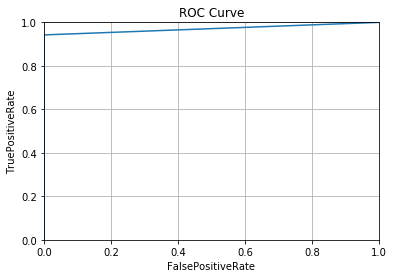

In [68]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve')
plt.xlabel('FalsePositiveRate')
plt.ylabel('TruePositiveRate')
plt.grid(True)